In [6]:
import torch as t
import numpy as np #interp, repeat
from livelossplot import PlotLosses

In [7]:
x_base = t.FloatTensor([[0,0,1], [0,1,0], [1,1,0], [1,0,0]])
y_base = t.FloatTensor([1, 1, 0, 0])

modes = {'train':0.70, 'valid':0.20, 'test':0.10}
scatter = 0.3
features = 3
augmentation_size = 100
datasets = {mode:None for mode in modes.keys()}

for mode, proportion in modes.items():
    actual_augmentation = int(augmentation_size*proportion)

    x_enhanced = t.zeros((actual_augmentation*x_base.size(0), features))
    y_enhanced = np.repeat(y_base, augmentation_size*proportion)

    for b, c in enumerate(x_base):
        for a in range(actual_augmentation):
            random_light = scatter/2-scatter*t.rand(features)
            scattered_feature = c + random_light
            x_enhanced[b*actual_augmentation + a] = t.FloatTensor(np.interp(scattered_feature, (scattered_feature.min(), scattered_feature.max()), (0, +1) ))

    datasets[mode] = t.utils.data.TensorDataset(x_enhanced, y_enhanced)

    print(f"{mode}-dataset size: {x_enhanced.shape}")


train-dataset size: torch.Size([280, 3])
valid-dataset size: torch.Size([80, 3])
test-dataset size: torch.Size([40, 3])


In [8]:
# class MLP(t.nn.Module):
#     def __init__(self, n_in: int, n_hid: int, n_out: int, do_prob: float=0.):
#         """
#         Args:
#             n_in: input dimension
#             n_hid: dimension of hidden layers
#             n_out: output dimension
#             do_prob: rate of dropout
#         """
#         super(MLP, self).__init__()

#         self.fc_hid = t.nn.Linear(n_in, n_hid)
#         self.fc_out = t.nn.Linear(n_hid, n_out)
#         self.bn_out = t.nn.BatchNorm1d(n_out)
#         self.bn_hid = t.nn.BatchNorm1d(n_hid)
#         self.dropout_prob = do_prob

#     def forward(self, inputs: t.Tensor) -> t.Tensor:
#         x = t.nn.functional.elu(self.fc_hid(inputs))
#         x = self.bn_hid(x)
#         # x = t.nn.functional.dropout(x, self.dropout_prob, training=self.training)
#         x = t.nn.functional.elu(self.fc_out(x))
#         return self.bn_out(x)

class MLP(t.nn.Module):
    def __init__(self, input_dim, output_dim):
        super(MLP, self).__init__()
        self.input_layer = t.nn.Linear(input_dim, 5)
        self.hidden_layer_2 = t.nn.Linear(5, 3)
        self.output_layer = t.nn.Linear(4, output_dim)
        
    def forward(self, x):
        x = t.nn.functional.relu(self.input_layer(x))
        x = t.nn.functional.relu(self.hidden_layer_1(x))
        x = t.nn.functional.relu(self.hidden_layer_2(x))

        x = t.sigmoid(self.output_layer(x))
        return x

In [9]:
learning_rate = 0.2
epochs = 100
batch_size = 10



model = MLP(features, 1)

opt = t.optim.Adam(model.parameters(), lr=learning_rate)
loss_fn = t.nn.BCELoss() 

dataloaders = {mode:None for mode in modes}
dataloaders["train"] = t.utils.data.DataLoader(datasets["train"], batch_size=batch_size, shuffle=True)
dataloaders["valid"] = t.utils.data.DataLoader(datasets["valid"], batch_size=batch_size, shuffle=True)
dataloaders["test"] = t.utils.data.DataLoader(datasets["test"], batch_size=batch_size, shuffle=True)

model.eval()

liveloss = PlotLosses()


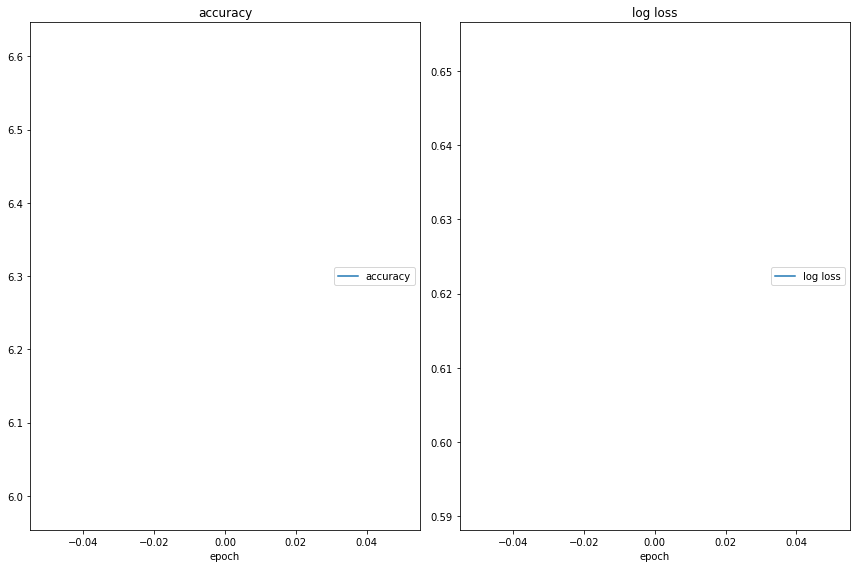

accuracy
	accuracy         	 (min:    6.300, max:    6.300, cur:    6.300)
log loss
	log loss         	 (min:    0.622, max:    0.622, cur:    0.622)


Traceback (most recent call last):
  File "_pydevd_bundle/pydevd_cython.pyx", line 1081, in _pydevd_bundle.pydevd_cython.PyDBFrame.trace_dispatch
  File "_pydevd_bundle/pydevd_cython.pyx", line 297, in _pydevd_bundle.pydevd_cython.PyDBFrame.do_wait_suspend
  File "/home/lc3267/Documents/CodeWorkspace/optuna-pytorch-testing/venv/lib64/python3.8/site-packages/debugpy/_vendored/pydevd/pydevd.py", line 2023, in do_wait_suspend
    keep_suspended = self._do_wait_suspend(thread, frame, event, arg, suspend_type, from_this_thread, frames_tracker)
  File "/home/lc3267/Documents/CodeWorkspace/optuna-pytorch-testing/venv/lib64/python3.8/site-packages/debugpy/_vendored/pydevd/pydevd.py", line 2059, in _do_wait_suspend
    time.sleep(0.01)
KeyboardInterrupt


Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/home/lc3267/Documents/CodeWorkspace/optuna-pytorch-testing/venv/lib64/python3.8/site-packages/IPython/core/interactiveshell.py", line 3398, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_17682/3859981432.py", line 16, in <cell line: 2>
    loss = loss_fn(y_pred.view(-1), y_batch)
  File "/tmp/ipykernel_17682/3859981432.py", line 16, in <cell line: 2>
    loss = loss_fn(y_pred.view(-1), y_batch)
  File "_pydevd_bundle/pydevd_cython.pyx", line 1366, in _pydevd_bundle.pydevd_cython.SafeCallWrapper.__call__
  File "_pydevd_bundle/pydevd_cython.pyx", line 662, in _pydevd_bundle.pydevd_cython.PyDBFrame.trace_dispatch
  File "_pydevd_bundle/pydevd_cython.pyx", line 1090, in _pydevd_bundle.pydevd_cython.PyDBFrame.trace_dispatch
  File "_pydevd_bundle/pydevd_cython.pyx", line 1081, in _pydevd_bundle.pydevd_cython.PyDBFrame.trace_dispatch
  File "_pydevd_bundle/pydevd_cython.pyx", line 297, in _pydevd_bundle.py

In [10]:

for e in range(epochs):
    logs = {}
    for mode in ['train', 'valid']:
        if mode == 'train':
            model.train()
        else:
            model.eval()

        running_loss = 0.0
        running_corrects = 0

        for x_batch, y_batch in dataloaders[mode]:
            y_pred = model(x_batch)

            loss = loss_fn(y_pred.view(-1), y_batch)

            if mode == 'train':
                opt.zero_grad()
                loss.backward()
                opt.step()

            running_loss += loss.detach() * x_batch.size(0)
            running_corrects += t.sum(y_pred >= 0.9*y_batch.data)
        epoch_loss = running_loss / len(dataloaders[mode].dataset)
        epoch_acc = running_corrects.float() / len(dataloaders[mode].dataset)
        print(epoch_loss)
        prefix = ''
        if mode == 'validation':
            prefix = 'val_'

        logs[prefix + 'log loss'] = epoch_loss.item()
        logs[prefix + 'accuracy'] = epoch_acc.item()
    liveloss.update(logs)
    liveloss.send()
    